In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

# Gęste kodowanie

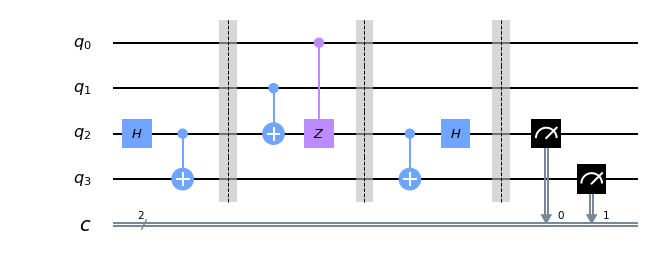

In [2]:
circ = QuantumCircuit(4,2)
circ.h(2)
circ.cx(2,3)
# tworzenie stanu Bella
# q3 zostaje przesłany do Bolka
# q2 nalezy do Alicji

# q0 i q1 to qubity kontolne pozwalające na łatwiejsze zakodowanie informacji

circ.barrier()

# jeśli Alicja chce przesłac
# 0 - nie robi nic
# 1 - wykonuje bramkę Z na swoim kubicie
# 2 - wykonue NOT
# 3 - wykonuje NOt i Z
circ.cx(1,2)
circ.cz(0,2)
# informacja została zakodowana

circ.barrier()

# przesłanie informacji kwantowej - kubitu Alicji do Bolka
# wykonanie pomiaru w bazie Bella
circ.cx(2,3)
circ.h(2)

circ.barrier()

circ.measure(2,0)
circ.measure(3,1)
# pomiar u Bolka powinien pozwolić na otrzymanie tych samych wartości które zakodowała Alicja

circ.draw()

{'00': 1024}


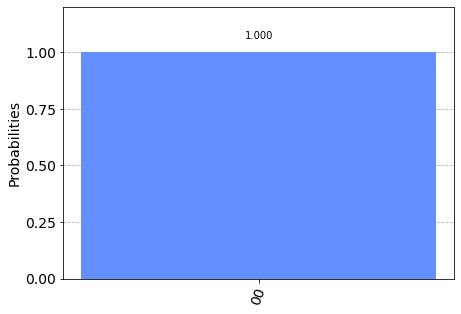

In [4]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
#histogram z symulatora pokozuje prawdopodobieństwo zaistnienia poszczególnych stanów
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [5]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_essex')
from qiskit.tools.monitor import job_monitor

In [6]:
job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


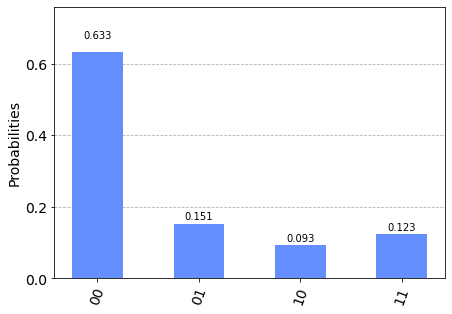

In [7]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram(counts_exp)
#histogram z prawdziwego komuptera kwantowego pokazuje prawdopodobieństwo zaistnienia poszczególnych stanów